In [6]:
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
!pip install matplotlib

  Using cached matplotlib-3.9.3-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.55.2-cp312-cp312-win_amd64.whl.metadata (168 kB)
  Using cached kiwisolver-1.4.7-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-11.0.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.9.3-cp312-cp312-win_amd64.whl (7.8 MB)
Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl (220 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.55.2-cp312-cp312-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.7-cp312-cp312-win_amd64.whl (55 kB)
Using cached pillow-11.0.0-cp312-cp312-win_amd64.whl (2.6 MB)
Using cached pyparsing-3.2.0-py3-none-any.whl (106 kB)


In [5]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [3]:
pip install matplotlib-venn


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   ----- ---------------------------------- 5.8/44.5 MB 32.0 MB/s eta 0:00:02
   ----------- ---------------------------- 12.3/44.5 MB 30.8 MB/s eta 0:00:02
   --------------- ------------------------ 17.0/44.5 MB 27.5 MB/s eta 0:00:01
   --------------------- ------------------ 23.6/44.5 MB 28.2 MB/s eta 0:00:01
   -------------------------- ------------- 29.9/44.5 MB 28.3 MB/s eta 0:00:01
   -------------------------------- ------- 36.4/44.5 MB 28.9 MB/s eta 0:00:01
   -------------------------------------- - 43.0/44.5 MB 29.1 MB/s eta 0:00:01
   ---------------------------------------  44.

In [ ]:
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Connect to MongoDB
client = MongoClient("mongodb://localhost:27017/")
db = client["lang_patient_db"]

# Load collections into Pandas DataFrames
hypertension_data = pd.DataFrame(list(db.hyper.find()))
depression_anxiety_data = pd.DataFrame(list(db.depression_anxiety.find()))

# Ensure pat_id exists in both datasets
if "pat_id" in hypertension_data.columns and "pat_id" in depression_anxiety_data.columns:
    # Get unique patient IDs for each condition
    hypertension_patients = set(hypertension_data["pat_id"])
    depression_anxiety_patients = set(depression_anxiety_data["pat_id"])

    # Calculate overlap
    overlap_patients = hypertension_patients.intersection(depression_anxiety_patients)
    only_hypertension = hypertension_patients - overlap_patients
    only_depression_anxiety = depression_anxiety_patients - overlap_patients

    # Print stats
    print(f"Total Hypertension Patients: {len(hypertension_patients)}")
    print(f"Total Depression Anxiety Patients: {len(depression_anxiety_patients)}")
    print(f"Patients with Both Conditions: {len(overlap_patients)}")

    # Venn Diagram
    plt.figure(figsize=(8, 6))
    venn = venn2(subsets=(
        len(only_hypertension),
        len(only_depression_anxiety),
        len(overlap_patients)
    ), set_labels=("Hypertension", "Depression Anxiety"))
    plt.title("Overlap of Patients with Hypertension and Depression Anxiety")
    plt.show()

    # Bar Plot
    overlap_counts = {
        "Hypertension Only": len(only_hypertension),
        "Depression Anxiety Only": len(only_depression_anxiety),
        "Both Conditions": len(overlap_patients)
    }
    plt.figure(figsize=(8, 6))
    plt.bar(overlap_counts.keys(), overlap_counts.values(), color=["blue", "orange", "green"])
    plt.title("Number of Patients with Overlapping Conditions")
    plt.ylabel("Number of Patients")
    plt.show()
else:
    print("The 'pat_id' column is missing in one or both datasets.")


C:\Users\shruti\AppData\Local\Temp\ipykernel_11556\966828951.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["order_start_time"] = pd.to_datetime(df["order_start_time"], errors="coerce")
C:\Users\shruti\AppData\Local\Temp\ipykernel_11556\966828951.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["order_end_time"] = pd.to_datetime(df["order_end_time"], errors="coerce")
C:\Users\shruti\AppData\Local\Temp\ipykernel_11556\966828951.py:38: SettingWithCopyWarning: 
A value is trying to be set on a 

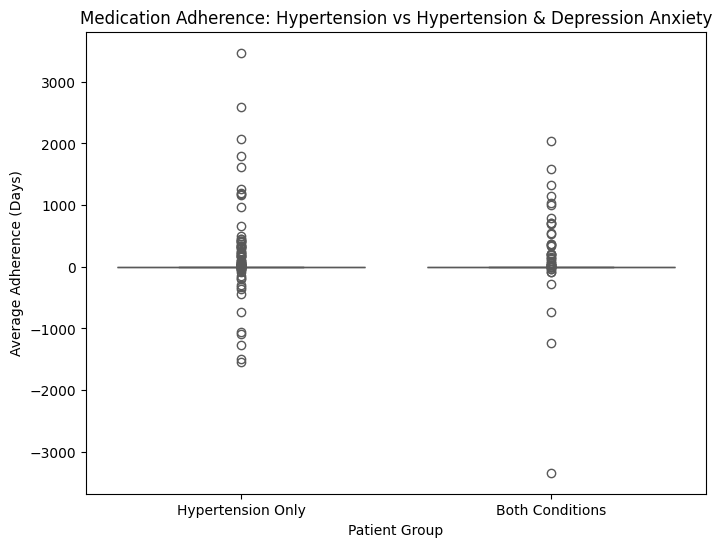

Mean Adherence (Hypertension Only): 32.83104125736739
Mean Adherence (Both Conditions): 39.84615384615385


In [5]:
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to MongoDB
client = MongoClient("mongodb://localhost:27017/")
db = client["lang_patient_db"]

# Load collections into Pandas DataFrames
hypertension_data = pd.DataFrame(list(db.hyper.find()))
depression_anxiety_data = pd.DataFrame(list(db.depression_anxiety.find()))

# Ensure pat_id exists in both datasets
if "pat_id" in hypertension_data.columns and "pat_id" in depression_anxiety_data.columns:
    # Get unique patient IDs for each condition
    hypertension_patients = set(hypertension_data["pat_id"])
    depression_anxiety_patients = set(depression_anxiety_data["pat_id"])

    # Group patients
    only_hypertension_patients = hypertension_patients - depression_anxiety_patients
    both_conditions_patients = hypertension_patients.intersection(depression_anxiety_patients)

    # Filter medication data for analysis
    medication_columns = ["pat_id", "medication_name", "order_start_time", "order_end_time", "order_status"]
    if all(col in hypertension_data.columns for col in medication_columns):
        # Hypertension Only Group
        hypertension_medication = hypertension_data[hypertension_data["pat_id"].isin(only_hypertension_patients)]

        # Both Conditions Group
        both_conditions_medication = hypertension_data[hypertension_data["pat_id"].isin(both_conditions_patients)]

        # Define a function to calculate medication adherence
        def calculate_adherence(df):
            # Convert times to datetime
            df["order_start_time"] = pd.to_datetime(df["order_start_time"], errors="coerce")
            df["order_end_time"] = pd.to_datetime(df["order_end_time"], errors="coerce")
            df["adherence_days"] = (df["order_end_time"] - df["order_start_time"]).dt.days
            df["adherence_days"] = df["adherence_days"].fillna(0)  # Fill NaN with 0
            return df.groupby("pat_id")["adherence_days"].mean()

        # Calculate adherence
        adherence_hypertension = calculate_adherence(hypertension_medication)
        adherence_both_conditions = calculate_adherence(both_conditions_medication)

        # Combine adherence data for comparison
        adherence_data = pd.DataFrame({
            "Adherence (Days)": pd.concat([adherence_hypertension, adherence_both_conditions]),
            "Group": (["Hypertension Only"] * len(adherence_hypertension)) +
                     (["Both Conditions"] * len(adherence_both_conditions))
        })

        # Plot Adherence Comparison
        plt.figure(figsize=(8, 6))
        sns.boxplot(x="Group", y="Adherence (Days)", data=adherence_data, palette="Set2")
        plt.title("Medication Adherence: Hypertension vs Hypertension & Depression Anxiety")
        plt.ylabel("Average Adherence (Days)")
        plt.xlabel("Patient Group")
        plt.show()

        # Statistical Test: Mean Adherence
        print("Mean Adherence (Hypertension Only):", adherence_hypertension.mean())
        print("Mean Adherence (Both Conditions):", adherence_both_conditions.mean())
else:
    print("The 'pat_id' column is missing in one or both datasets.")


In [ ]:
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to MongoDB
client = MongoClient("mongodb://localhost:27017/")
db = client["lang_patient_db"]

# Limit the number of records fetched
LIMIT_ROWS = 400000

# Load collections into Pandas DataFrames with a limit
hypertension_data = pd.DataFrame(list(db.hyper.find().limit(LIMIT_ROWS)))
depression_anxiety_data = pd.DataFrame(list(db.depression_anxiety.find().limit(LIMIT_ROWS)))

# Ensure relevant columns exist
social_history_columns = ["tobacco_use", "alcohol_use", "smokeless_tobacco_use", "iv_drug_use", "sexually_active"]
medication_columns = ["pat_id", "medication_name", "order_start_time", "order_end_time", "order_status"]
if all(col in hypertension_data.columns for col in social_history_columns + medication_columns):
    # Group Patients
    hypertension_patients = set(hypertension_data["pat_id"])
    depression_anxiety_patients = set(depression_anxiety_data["pat_id"])

    only_hypertension_patients = hypertension_patients - depression_anxiety_patients
    both_conditions_patients = hypertension_patients.intersection(depression_anxiety_patients)

    # Filter Data for Analysis
    hypertension_medication = hypertension_data[hypertension_data["pat_id"].isin(only_hypertension_patients)]
    both_conditions_medication = hypertension_data[hypertension_data["pat_id"].isin(both_conditions_patients)]

    # Define a function to calculate medication adherence
    def calculate_adherence(df):
        df["order_start_time"] = pd.to_datetime(df["order_start_time"], errors="coerce")
        df["order_end_time"] = pd.to_datetime(df["order_end_time"], errors="coerce")
        df["adherence_days"] = (df["order_end_time"] - df["order_start_time"]).dt.days
        df["adherence_days"] = df["adherence_days"].fillna(0)
        return df

    # Clean and Calculate Adherence
    hypertension_medication = calculate_adherence(hypertension_medication)
    both_conditions_medication = calculate_adherence(both_conditions_medication)

    # Combine Social History with Adherence
    social_history_hyper = hypertension_medication[social_history_columns + ["adherence_days"]].copy()
    social_history_both = both_conditions_medication[social_history_columns + ["adherence_days"]].copy()

    # Add Group Labels
    social_history_hyper["Group"] = "Hypertension Only"
    social_history_both["Group"] = "Both Conditions"

    combined_social_history = pd.concat([social_history_hyper, social_history_both], ignore_index=True)

    # Bar Plot for Each Social History Feature
    for feature in social_history_columns:
        adherence_by_feature = combined_social_history.groupby([feature, "Group"])["adherence_days"].mean().reset_index()

        plt.figure(figsize=(10, 6))
        sns.barplot(x=feature, y="adherence_days", hue="Group", data=adherence_by_feature, palette="Set2")
        plt.title(f"Average Medication Adherence by {feature.capitalize()}")
        plt.ylabel("Average Adherence (Days)")
        plt.xlabel(feature.replace("_", " ").capitalize())
        plt.xticks(rotation=45)
        plt.legend(title="Group")
        plt.show()
else:
    print("Some required columns are missing for social history or medication analysis.")


Age Group Distribution (Counts):
           Hypertension  Depression Anxiety
age_group                                  
0-20                  0                  28
21-40                21                 140
41-60               144                 139
61-80               575                 586
81+                 173                  89


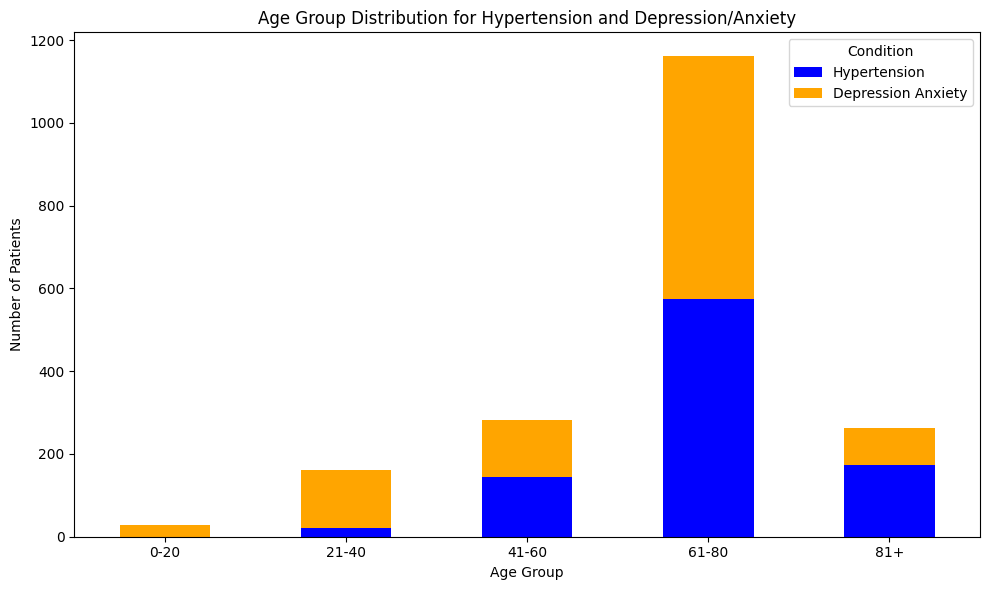

Age Group 0-20: Hypertension patients = 0 (0.00%), Depression Anxiety patients = 28 (1.48%).
Age Group 21-40: Hypertension patients = 21 (1.11%), Depression Anxiety patients = 140 (7.39%).
Age Group 41-60: Hypertension patients = 144 (7.60%), Depression Anxiety patients = 139 (7.34%).
Age Group 61-80: Hypertension patients = 575 (30.34%), Depression Anxiety patients = 586 (30.92%).
Age Group 81+: Hypertension patients = 173 (9.13%), Depression Anxiety patients = 89 (4.70%).


In [2]:
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to MongoDB
client = MongoClient("mongodb://localhost:27017/")
db = client["lang_patient_db"]

# Load collections into Pandas DataFrames
hypertension_data = pd.DataFrame(list(db.hyper.find().limit(1000)))
depression_anxiety_data = pd.DataFrame(list(db.depression_anxiety.find().limit(1000)))

# Ensure the 'age' column exists
if "age" in hypertension_data.columns and "age" in depression_anxiety_data.columns:
    # Convert 'age' to numeric and clean invalid values
    hypertension_data["age"] = pd.to_numeric(hypertension_data["age"], errors="coerce")
    depression_anxiety_data["age"] = pd.to_numeric(depression_anxiety_data["age"], errors="coerce")

    hypertension_data = hypertension_data[(hypertension_data["age"] > 0) & (hypertension_data["age"] < 120)]
    depression_anxiety_data = depression_anxiety_data[(depression_anxiety_data["age"] > 0) & (depression_anxiety_data["age"] < 120)]

    # Define age groups
    bins = [0, 20, 40, 60, 80, 120]
    labels = ["0-20", "21-40", "41-60", "61-80", "81+"]

    # Create age group column
    hypertension_data["age_group"] = pd.cut(hypertension_data["age"], bins=bins, labels=labels, right=False)
    depression_anxiety_data["age_group"] = pd.cut(depression_anxiety_data["age"], bins=bins, labels=labels, right=False)

    # Count patients in each age group for both conditions
    hypertension_age_groups = hypertension_data["age_group"].value_counts(sort=False)
    depression_anxiety_age_groups = depression_anxiety_data["age_group"].value_counts(sort=False)

    # Combine into a single DataFrame for visualization
    age_group_comparison = pd.DataFrame({
        "Hypertension": hypertension_age_groups,
        "Depression Anxiety": depression_anxiety_age_groups
    }).fillna(0)

    print("\nAge Group Distribution (Counts):")
    print(age_group_comparison)

    # Visualization: Stacked Bar Chart
    age_group_comparison.plot(kind="bar", stacked=True, figsize=(10, 6), color=["blue", "orange"])

    plt.title("Age Group Distribution for Hypertension and Depression/Anxiety")
    plt.xlabel("Age Group")
    plt.ylabel("Number of Patients")
    plt.legend(title="Condition")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # Quantitative Results
    total_patients = age_group_comparison.sum().sum()
    for age_group, row in age_group_comparison.iterrows():
        hypertension_pct = (row["Hypertension"] / total_patients) * 100
        depression_anxiety_pct = (row["Depression Anxiety"] / total_patients) * 100
        print(
            f"Age Group {age_group}: "
            f"Hypertension patients = {row['Hypertension']} ({hypertension_pct:.2f}%), "
            f"Depression Anxiety patients = {row['Depression Anxiety']} ({depression_anxiety_pct:.2f}%)."
        )
else:
    print("Age column ('age') is not available in one or both datasets.")


Gender Distribution Across Conditions (Counts and Proportions):
        Hypertension  Depression Anxiety  Hypertension Proportion  \
sex                                                                 
Female           471                 501                     47.1   
Male             529                 499                     52.9   

        Depression Anxiety Proportion  
sex                                    
Female                           50.1  
Male                             49.9  


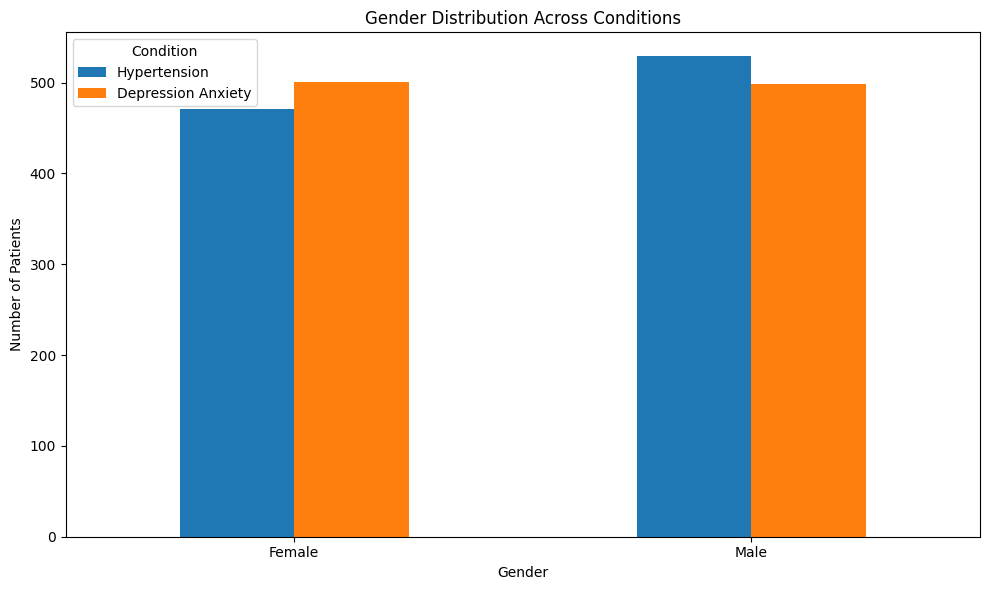

For Female: Hypertension patients = 471.0 (47.10%), Depression Anxiety patients = 501.0 (50.10%).
For Male: Hypertension patients = 529.0 (52.90%), Depression Anxiety patients = 499.0 (49.90%).


In [3]:
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to MongoDB
client = MongoClient("mongodb://localhost:27017/")
db = client["lang_patient_db"]

# Load collections into Pandas DataFrames
hypertension_data = pd.DataFrame(list(db.hyper.find().limit(1000)))
depression_anxiety_data = pd.DataFrame(list(db.depression_anxiety.find().limit(1000)))

# Ensure gender ('sex') column exists
if "sex" in hypertension_data.columns and "sex" in depression_anxiety_data.columns:
    # Count occurrences of each gender
    hypertension_gender_counts = hypertension_data["sex"].value_counts()
    depression_anxiety_gender_counts = depression_anxiety_data["sex"].value_counts()

    # Combine into a single DataFrame for comparison
    gender_comparison = pd.DataFrame({
        "Hypertension": hypertension_gender_counts,
        "Depression Anxiety": depression_anxiety_gender_counts
    }).fillna(0)  # Fill missing values with 0

    # Calculate proportions for each gender
    gender_comparison["Hypertension Proportion"] = (gender_comparison["Hypertension"] / gender_comparison["Hypertension"].sum()) * 100
    gender_comparison["Depression Anxiety Proportion"] = (gender_comparison["Depression Anxiety"] / gender_comparison["Depression Anxiety"].sum()) * 100

    print("\nGender Distribution Across Conditions (Counts and Proportions):")
    print(gender_comparison)

    # Visualization
    gender_comparison_plot = gender_comparison[["Hypertension", "Depression Anxiety"]]
    gender_comparison_plot.plot(kind="bar", figsize=(10, 6), rot=0)

    plt.title("Gender Distribution Across Conditions")
    plt.xlabel("Gender")
    plt.ylabel("Number of Patients")
    plt.legend(title="Condition")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # Quantitative Results
    for gender, row in gender_comparison.iterrows():
        print(
            f"For {gender}: "
            f"Hypertension patients = {row['Hypertension']} ({row['Hypertension Proportion']:.2f}%), "
            f"Depression Anxiety patients = {row['Depression Anxiety']} ({row['Depression Anxiety Proportion']:.2f}%)."
        )
else:
    print("Gender ('sex') column is not available in one or both datasets.")


In [2]:
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt

# Connect to MongoDB
client = MongoClient("mongodb://localhost:27017/")
db = client["lang_patient_db"]

# Load collections into Pandas DataFrames
hypertension_data = pd.DataFrame(list(db.hyper.find()))
depression_anxiety_data = pd.DataFrame(list(db.depression_anxiety.find()))

# Ensure the 'pat_id' column exists
if "pat_id" in hypertension_data.columns and "pat_id" in depression_anxiety_data.columns:
    # Get unique patient IDs for each condition
    hypertension_patients = set(hypertension_data["pat_id"])
    depression_anxiety_patients = set(depression_anxiety_data["pat_id"])

    # Patients with both conditions
    common_patients = hypertension_patients & depression_anxiety_patients
    common_data = pd.concat([
        hypertension_data[hypertension_data["pat_id"].isin(common_patients)],
        depression_anxiety_data[depression_anxiety_data["pat_id"].isin(common_patients)]
    ])

    # Demographic Attributes
    demographic_columns = ["sex", "age", "race", "ethnicity"]

    # Plot side-by-side comparison
    for col in demographic_columns:
        if col in common_data.columns:
            plt.figure(figsize=(12, 6))

            # Plot counts for the attribute
            common_data[col].value_counts().plot(kind="bar", alpha=0.7, label="Patients with Both Conditions")
            plt.title(f"Distribution of {col.capitalize()} among Patients with Both Conditions")
            plt.xlabel(col.capitalize())
            plt.ylabel("Count")
            plt.legend()
            plt.xticks(rotation=45)
            plt.show()

    # Print summary statistics for numerical attributes
    if "age" in common_data.columns:
        print("\nAge Statistics for Patients with Both Conditions:")
        print(common_data["age"].describe())

else:
    print("Patient ID ('pat_id') column is not available in one or both datasets.")

KeyboardInterrupt: 


Medication Adherence Rates:
                           Condition  Adherence Rate
0                  Hypertension Only       17.121164
1  Hypertension & Depression/Anxiety       17.432760


C:\Users\shruti\AppData\Local\Temp\ipykernel_16452\3718955663.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=adherence_comparison, x="Condition", y="Adherence Rate", palette="viridis")


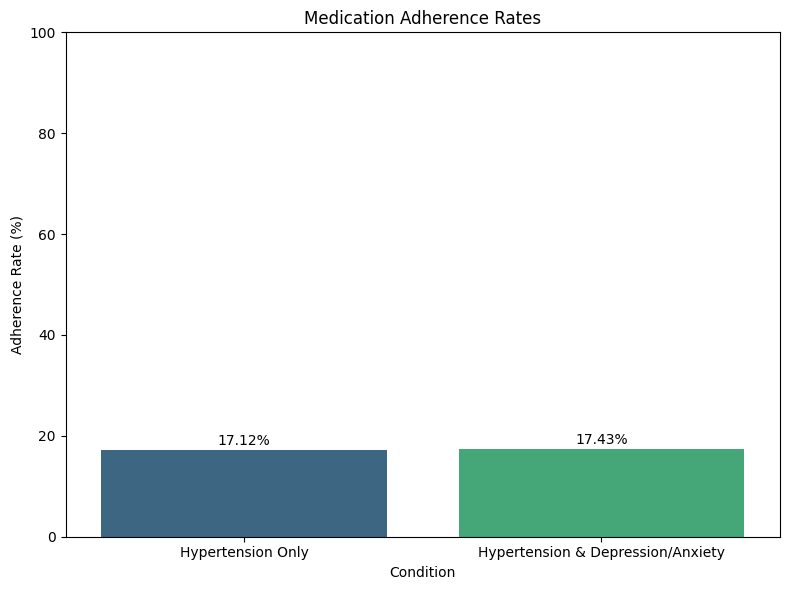


Quantitative Results:
Hypertension Only: 17.12% adherence
Hypertension & Depression/Anxiety: 17.43% adherence


In [1]:
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to MongoDB
client = MongoClient("mongodb://localhost:27017/")
db = client["lang_patient_db"]

# Load collections into Pandas DataFrames
hypertension_data = pd.DataFrame(list(db.hyper.find()))
depression_anxiety_data = pd.DataFrame(list(db.depression_anxiety.find()))

# Ensure relevant columns exist
if "order_status" in hypertension_data.columns and "order_status" in depression_anxiety_data.columns:
    # Filter hypertension patients with completed medication orders
    hypertension_adherence = hypertension_data[hypertension_data["order_status"] == "Completed"]
    hypertension_adherence_rate = (len(hypertension_adherence) / len(hypertension_data)) * 100

    # Identify patients with both hypertension and depression/anxiety
    common_patients = hypertension_data[hypertension_data["pat_id"].isin(depression_anxiety_data["pat_id"])]
    common_adherence = common_patients[common_patients["order_status"] == "Completed"]
    common_adherence_rate = (len(common_adherence) / len(common_patients)) * 100

    # Create a DataFrame for visualization
    adherence_comparison = pd.DataFrame({
        "Condition": ["Hypertension Only", "Hypertension & Depression/Anxiety"],
        "Adherence Rate": [hypertension_adherence_rate, common_adherence_rate]
    })

    print("\nMedication Adherence Rates:")
    print(adherence_comparison)

    # Visualization: Grouped Bar Chart
    plt.figure(figsize=(8, 6))
    sns.barplot(data=adherence_comparison, x="Condition", y="Adherence Rate", palette="viridis")
    plt.title("Medication Adherence Rates")
    plt.xlabel("Condition")
    plt.ylabel("Adherence Rate (%)")
    plt.ylim(0, 100)
    for index, row in adherence_comparison.iterrows():
        plt.text(index, row["Adherence Rate"] + 1, f"{row['Adherence Rate']:.2f}%", ha="center")
    plt.tight_layout()
    plt.show()

    # Quantitative Results
    print(f"\nQuantitative Results:")
    print(f"Hypertension Only: {hypertension_adherence_rate:.2f}% adherence")
    print(f"Hypertension & Depression/Anxiety: {common_adherence_rate:.2f}% adherence")
else:
    print("The 'order_status' column is missing in one or both datasets.")


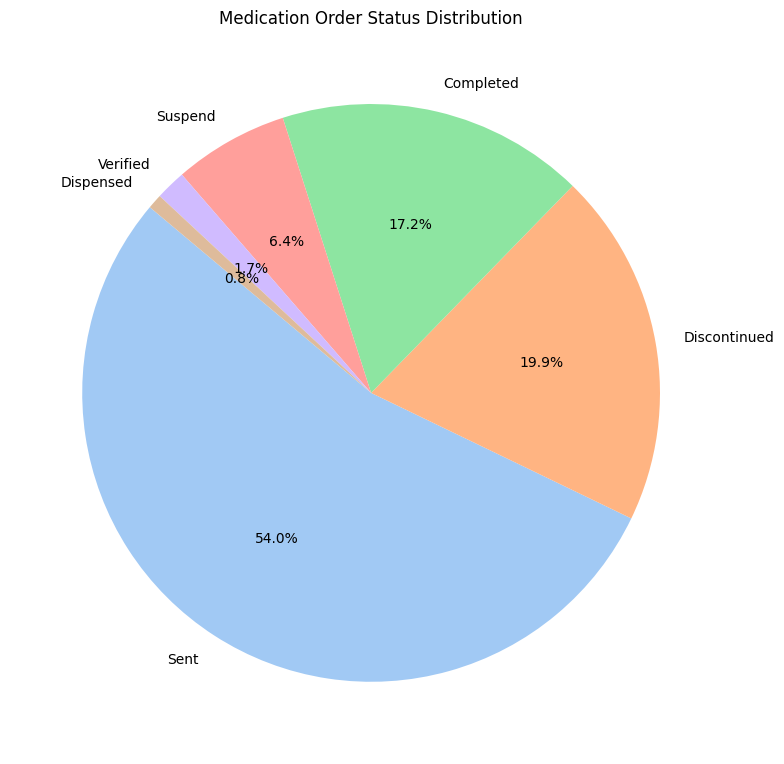

C:\Users\shruti\AppData\Local\Temp\ipykernel_16452\173891517.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=combined_data, x="order_status", y="frequency", palette="muted")


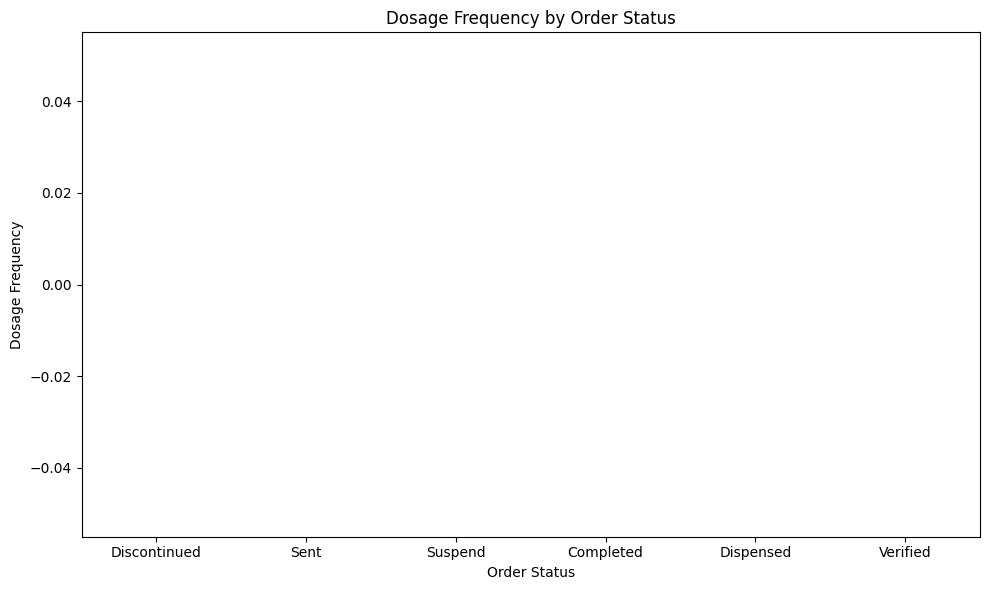


Quantitative Results:
Order Status Distribution (Counts):
order_status
Sent            237354
Discontinued     87400
Completed        75809
Suspend          28255
Verified          7478
Dispensed         3607
Name: count, dtype: int64

Average Dosage Frequency by Order Status:
order_status
Completed      NaN
Discontinued   NaN
Dispensed      NaN
Sent           NaN
Suspend        NaN
Verified       NaN
Name: frequency, dtype: float64


In [6]:
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to MongoDB
client = MongoClient("mongodb://localhost:27017/")
db = client["lang_patient_db"]

# Define batch size for chunk processing
batch_size = 1000

# Fetch data in chunks
def fetch_data(collection, filters=None, fields=None):
    chunk_list = []
    skip = 0  # Track the number of documents already fetched

    while True:
        cursor = db[collection].find(filters or {}, fields or {}).skip(skip).limit(batch_size)
        batch = list(cursor)
        if not batch:
            break
        chunk_df = pd.DataFrame(batch)
        chunk_list.append(chunk_df)
        skip += batch_size  # Increment skip by the batch size

    return pd.concat(chunk_list, ignore_index=True) if chunk_list else pd.DataFrame()


# Fetch hypertension data
hypertension_data = fetch_data(
    "hyper",
    fields={"pat_id": 1, "order_status": 1, "frequency": 1, "_id": 0}
)

# Fetch depression/anxiety data
depression_anxiety_data = fetch_data(
    "depression_anxiety",
    fields={"pat_id": 1}
)

# Ensure required columns exist
if not hypertension_data.empty and "order_status" in hypertension_data.columns and "frequency" in hypertension_data.columns:
    # Combine hypertension and overlapping patients with depression/anxiety
    common_patients = hypertension_data[hypertension_data["pat_id"].isin(depression_anxiety_data["pat_id"])]
    combined_data = pd.concat([hypertension_data, common_patients])

    # Pie Chart: Order Status Distribution
    order_status_counts = combined_data["order_status"].value_counts()
    plt.figure(figsize=(8, 8))
    order_status_counts.plot.pie(
        autopct="%1.1f%%",
        startangle=140,
        labels=order_status_counts.index,
        colors=sns.color_palette("pastel", len(order_status_counts))
    )
    plt.title("Medication Order Status Distribution")
    plt.ylabel("")  # Remove default y-axis label
    plt.tight_layout()
    plt.show()

    # Violin Plot: Frequency of Dosage by Order Status
    combined_data["frequency"] = pd.to_numeric(combined_data["frequency"], errors="coerce")
    plt.figure(figsize=(10, 6))
    sns.violinplot(data=combined_data, x="order_status", y="frequency", palette="muted")
    plt.title("Dosage Frequency by Order Status")
    plt.xlabel("Order Status")
    plt.ylabel("Dosage Frequency")
    plt.tight_layout()
    plt.show()

    # Quantitative Analysis
    print("\nQuantitative Results:")
    print("Order Status Distribution (Counts):")
    print(order_status_counts)

    avg_frequency_by_status = combined_data.groupby("order_status")["frequency"].mean()
    print("\nAverage Dosage Frequency by Order Status:")
    print(avg_frequency_by_status)
else:
    print("Relevant columns ('order_status' or 'frequency') are missing in the dataset.")


In [3]:
!pip install plotly

   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ------- -------------------------------- 3.7/19.1 MB 21.8 MB/s eta 0:00:01
   ----------------- ---------------------- 8.4/19.1 MB 21.7 MB/s eta 0:00:01
   -------------------------- ------------- 12.8/19.1 MB 21.2 MB/s eta 0:00:01
   ------------------------------------ --- 17.6/19.1 MB 21.7 MB/s eta 0:00:01
   ---------------------------------------  18.9/19.1 MB 21.7 MB/s eta 0:00:01
   ---------------------------------------- 19.1/19.1 MB 17.9 MB/s eta 0:00:00


In [5]:
!pip install notebook jupyterlab

  Using cached notebook-7.3.1-py3-none-any.whl.metadata (10 kB)
  Using cached jupyter_server-2.14.2-py3-none-any.whl.metadata (8.4 kB)
  Using cached jupyterlab_server-2.27.3-py3-none-any.whl.metadata (5.9 kB)
  Using cached notebook_shim-0.2.4-py3-none-any.whl.metadata (4.0 kB)
  Using cached async_lru-2.0.4-py3-none-any.whl.metadata (4.5 kB)
  Using cached httpx-0.28.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached jinja2-3.1.4-py3-none-any.whl.metadata (2.6 kB)
  Using cached jupyter_lsp-2.2.5-py3-none-any.whl.metadata (1.8 kB)
  Using cached setuptools-75.6.0-py3-none-any.whl.metadata (6.7 kB)
  Using cached anyio-4.7.0-py3-none-any.whl.metadata (4.7 kB)
  Using cached certifi-2024.8.30-py3-none-any.whl.metadata (2.2 kB)
  Using cached httpcore-1.0.7-py3-none-any.whl.metadata (21 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached h11-0.14.0-py3-none-any.whl.metadata (8.2 kB)
  Using cached MarkupSafe-3.0.2-cp312-cp312-win_amd64.whl.metadata (4.1 kB)
 

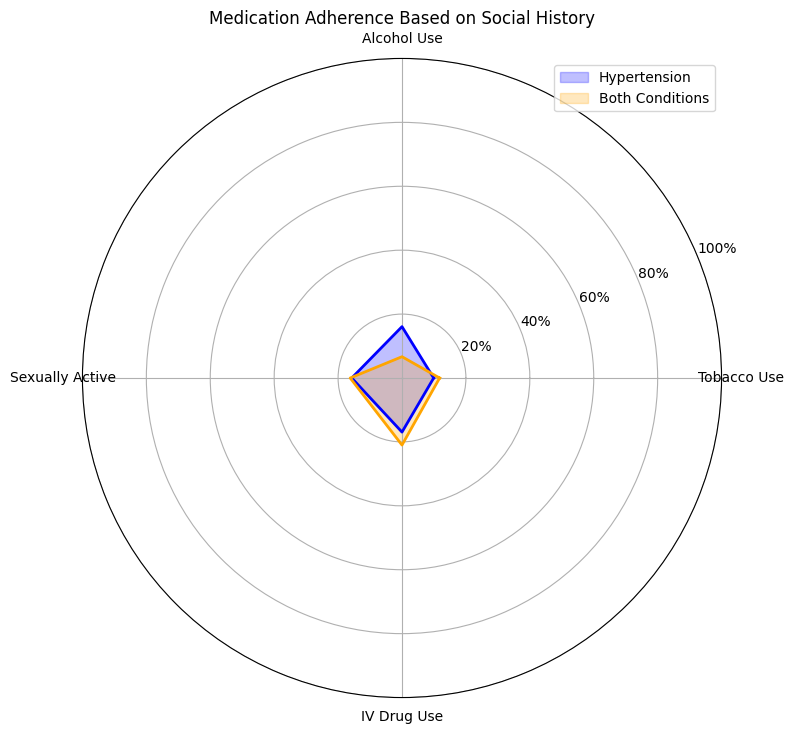


Quantitative Results:
Hypertension Adherence Rates: [np.float64(9.917521919332419), np.float64(16.068663418454257), np.float64(15.72154053285143), np.float64(16.926961958211507)]
Both Conditions Adherence Rates: [np.float64(11.771884120923612), np.float64(6.663717254535137), np.float64(16.209053223497147), np.float64(20.97912164834211)]


In [3]:
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Connect to MongoDB
client = MongoClient("mongodb://localhost:27017/")
db = client["lang_patient_db"]

# Load collections into Pandas DataFrames
hypertension_data = pd.DataFrame(list(db.hyper.find()))
depression_anxiety_data = pd.DataFrame(list(db.depression_anxiety.find()))

# Ensure necessary columns exist
necessary_columns = {"order_status", "tobacco_use", "alcohol_use", "sexually_active", "iv_drug_use"}
if necessary_columns.issubset(hypertension_data.columns) and necessary_columns.issubset(depression_anxiety_data.columns):
    # Filter patients with both conditions (intersection of IDs)
    combined_ids = set(hypertension_data["pat_id"]).intersection(set(depression_anxiety_data["pat_id"]))
    combined_data = hypertension_data[hypertension_data["pat_id"].isin(combined_ids)]

    # Aggregate data for radar chart
    def aggregate_social_history(data):
        summary = (
            data.groupby(["tobacco_use", "alcohol_use", "sexually_active", "iv_drug_use"])["order_status"]
            .apply(lambda x: (x == "Completed").sum() / len(x) * 100)  # Percentage of completed orders
            .reset_index(name="adherence_rate")
        )
        return summary

    hypertension_summary = aggregate_social_history(hypertension_data)
    combined_summary = aggregate_social_history(combined_data)

    # Prepare radar chart data
    categories = ["Tobacco Use", "Alcohol Use", "Sexually Active", "IV Drug Use"]
    hypertension_rates = [
        hypertension_summary[hypertension_summary["tobacco_use"] == "Never"]["adherence_rate"].mean(),
        hypertension_summary[hypertension_summary["alcohol_use"] == "Yes"]["adherence_rate"].mean(),
        hypertension_summary[hypertension_summary["sexually_active"] == "Yes"]["adherence_rate"].mean(),
        hypertension_summary[hypertension_summary["iv_drug_use"] == "N"]["adherence_rate"].mean(),
    ]
    combined_rates = [
        combined_summary[combined_summary["tobacco_use"] == "Never"]["adherence_rate"].mean(),
        combined_summary[combined_summary["alcohol_use"] == "Yes"]["adherence_rate"].mean(),
        combined_summary[combined_summary["sexually_active"] == "Yes"]["adherence_rate"].mean(),
        combined_summary[combined_summary["iv_drug_use"] == "N"]["adherence_rate"].mean(),
    ]

    # Radar chart
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    hypertension_rates += hypertension_rates[:1]  # Close the circle
    combined_rates += combined_rates[:1]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={"polar": True})
    ax.fill(angles, hypertension_rates, color="blue", alpha=0.25, label="Hypertension")
    ax.fill(angles, combined_rates, color="orange", alpha=0.25, label="Both Conditions")
    ax.plot(angles, hypertension_rates, color="blue", linewidth=2)
    ax.plot(angles, combined_rates, color="orange", linewidth=2)
    ax.set_yticks([20, 40, 60, 80, 100])
    ax.set_yticklabels(["20%", "40%", "60%", "80%", "100%"])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.set_title("Medication Adherence Based on Social History")
    ax.legend(loc="upper right")
    plt.tight_layout()
    plt.show()

    # Quantitative results
    print("\nQuantitative Results:")
    print("Hypertension Adherence Rates:", hypertension_rates[:-1])
    print("Both Conditions Adherence Rates:", combined_rates[:-1])
else:
    print("Necessary columns are not available in one or both datasets.")


C:\Users\shruti\AppData\Local\Temp\ipykernel_11488\1088673975.py:24: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\shruti\AppData\Local\Temp\ipykernel_11488\1088673975.py:24: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



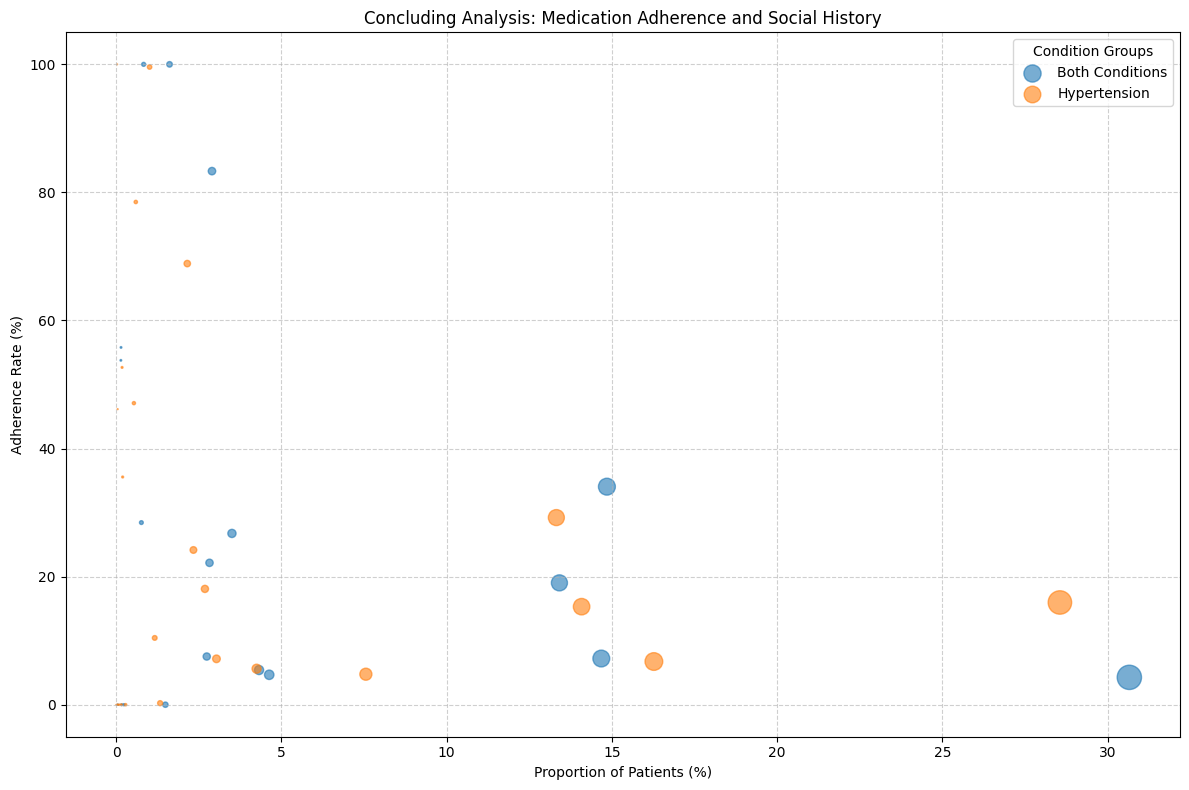

In [6]:
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt

# Connect to MongoDB
client = MongoClient("mongodb://localhost:27017/")
db = client["lang_patient_db"]

# Load collections into Pandas DataFrames
hypertension_data = pd.DataFrame(list(db.hyper.find()))
depression_anxiety_data = pd.DataFrame(list(db.depression_anxiety.find()))

# Ensure necessary columns exist
necessary_columns = {"order_status", "tobacco_use", "alcohol_use", "iv_drug_use"}
if necessary_columns.issubset(hypertension_data.columns) and necessary_columns.issubset(depression_anxiety_data.columns):
    # Filter patients with both conditions (intersection of IDs)
    combined_ids = set(hypertension_data["pat_id"]).intersection(set(depression_anxiety_data["pat_id"]))
    combined_data = hypertension_data[hypertension_data["pat_id"].isin(combined_ids)]

    # Aggregate data for bubble chart
    def aggregate_bubble_data(data, group_name):
        summary = (
            data.groupby(["tobacco_use", "alcohol_use", "iv_drug_use"])
            .apply(lambda x: pd.Series({
                "adherence_rate": (x["order_status"] == "Completed").sum() / len(x) * 100,
                "patient_proportion": len(x) / len(data) * 100
            }))
            .reset_index()
        )
        summary["group"] = group_name
        return summary

    hypertension_summary = aggregate_bubble_data(hypertension_data, "Hypertension")
    combined_summary = aggregate_bubble_data(combined_data, "Both Conditions")

    # Combine summaries
    summary_data = pd.concat([hypertension_summary, combined_summary])

    # Visualization: Bubble Chart
    plt.figure(figsize=(12, 8))
    groups = summary_data.groupby("group")

    for name, group in groups:
        plt.scatter(
            group["patient_proportion"],
            group["adherence_rate"],
            s=group["patient_proportion"] * 10,  # Scale bubble size
            alpha=0.6,
            label=name,
        )

    plt.title("Concluding Analysis: Medication Adherence and Social History")
    plt.xlabel("Proportion of Patients (%)")
    plt.ylabel("Adherence Rate (%)")
    plt.legend(title="Condition Groups")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

else:
    print("Necessary columns are not available in one or both datasets.")


In [ ]:
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt

# Connect to MongoDB
client = MongoClient("mongodb://localhost:27017/")
db = client["lang_patient_db"]

# Load collections into Pandas DataFrames
hypertension_data = pd.DataFrame(list(db.hyper.find()))
depression_anxiety_data = pd.DataFrame(list(db.depression_anxiety.find()))

# Ensure necessary columns exist
necessary_columns = {"order_status", "tobacco_use", "alcohol_use", "iv_drug_use", "age", "sex"}
if necessary_columns.issubset(hypertension_data.columns) and necessary_columns.issubset(depression_anxiety_data.columns):
    # Filter patients with both conditions (intersection of IDs)
    combined_ids = set(hypertension_data["pat_id"]).intersection(set(depression_anxiety_data["pat_id"]))
    combined_data = hypertension_data[hypertension_data["pat_id"].isin(combined_ids)]

    # Categorize age into groups
    age_bins = [0, 20, 40, 60, 80, 120]
    age_labels = ["0-20", "21-40", "41-60", "61-80", "81+"]
    for dataset in [hypertension_data, combined_data]:
        dataset["age_group"] = pd.cut(dataset["age"], bins=age_bins, labels=age_labels, right=False)

    # Aggregate data for bubble chart
    def aggregate_bubble_data(data, group_name):
        summary = (
            data.groupby(["sex", "age_group", "tobacco_use", "alcohol_use", "iv_drug_use"])
            .apply(lambda x: pd.Series({
                "adherence_rate": (x["order_status"] == "Completed").sum() / len(x) * 100,
                "patient_proportion": len(x) / len(data) * 100
            }))
            .reset_index()
        )
        summary["group"] = group_name
        return summary

    hypertension_summary = aggregate_bubble_data(hypertension_data, "Hypertension")
    combined_summary = aggregate_bubble_data(combined_data, "Both Conditions")

    # Combine summaries
    summary_data = pd.concat([hypertension_summary, combined_summary])

    # Visualization: Bubble Chart
    plt.figure(figsize=(14, 10))
    groups = summary_data.groupby("group")

    for name, group in groups:
        for _, row in group.iterrows():
            label = f"{row['sex']}, {row['age_group']}"
            plt.scatter(
                row["patient_proportion"],
                row["adherence_rate"],
                s=row["patient_proportion"] * 10,  # Scale bubble size
                alpha=0.6,
                label=label if name == "Hypertension" else None,
                edgecolor="black" if name == "Both Conditions" else "none",
                linewidth=0.5 if name == "Both Conditions" else 0,
                c="blue" if name == "Hypertension" else "orange"
            )

    plt.title("Medication Adherence Based on Social History, Age, and Gender")
    plt.xlabel("Proportion of Patients (%)")
    plt.ylabel("Adherence Rate (%)")
    plt.legend(title="Gender and Age Group", loc="upper right", bbox_to_anchor=(1.3, 1))
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

else:
    print("Necessary columns are not available in one or both datasets.")


In [8]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


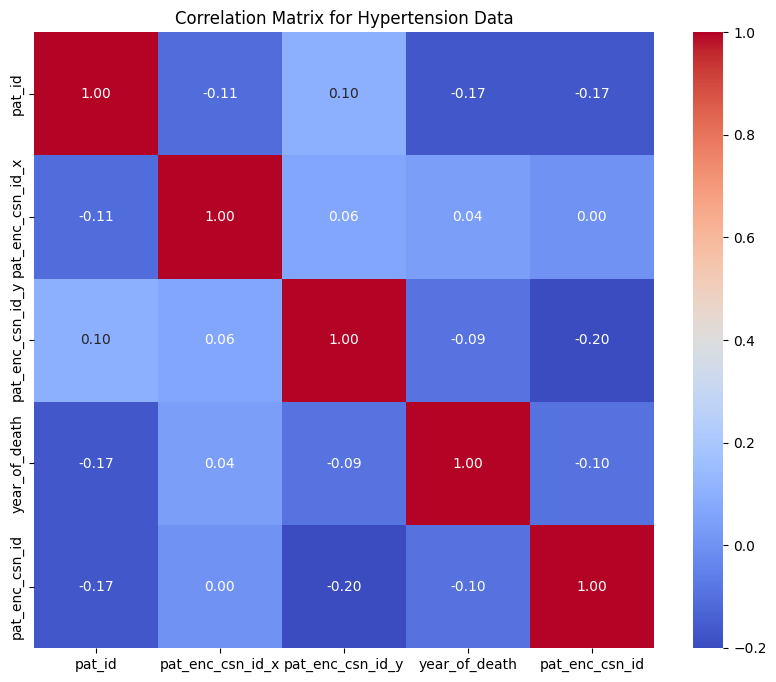

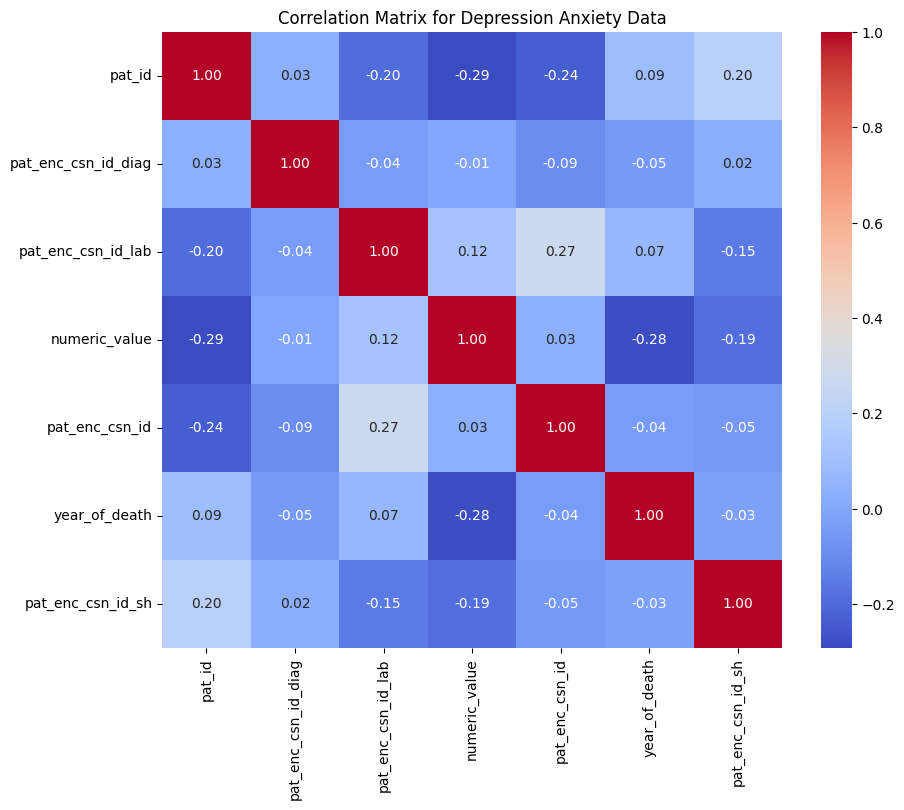

KeyError: 'age'

In [10]:
from pymongo import MongoClient
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Connect to MongoDB
client = MongoClient("mongodb://localhost:27017/")
db = client["lang_patient_db"]

# Load collections into Pandas DataFrames
hypertension_data = pd.DataFrame(list(db.hyper.find().limit(1000)))
depression_anxiety_data = pd.DataFrame(list(db.depression_anxiety.find().limit(1000)))

# Select Numeric Columns
numeric_cols_hyper = hypertension_data.select_dtypes(include=["float64", "int64"]).corr()
numeric_cols_depress = depression_anxiety_data.select_dtypes(include=["float64", "int64"]).corr()

# Correlation Heatmap for Hypertension
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols_hyper, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Hypertension Data")
plt.show()

# Correlation Heatmap for Depression Anxiety
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols_depress, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Depression Anxiety Data")
plt.show()

# Quantitative Summary
correlation_hyper = numeric_cols_hyper["age"].sort_values(ascending=False)
correlation_depress = numeric_cols_depress["age"].sort_values(ascending=False)

print("Top Correlations with Age in Hypertension Data:")
print(correlation_hyper.head())

print("\nTop Correlations with Age in Depression Anxiety Data:")
print(correlation_depress.head())


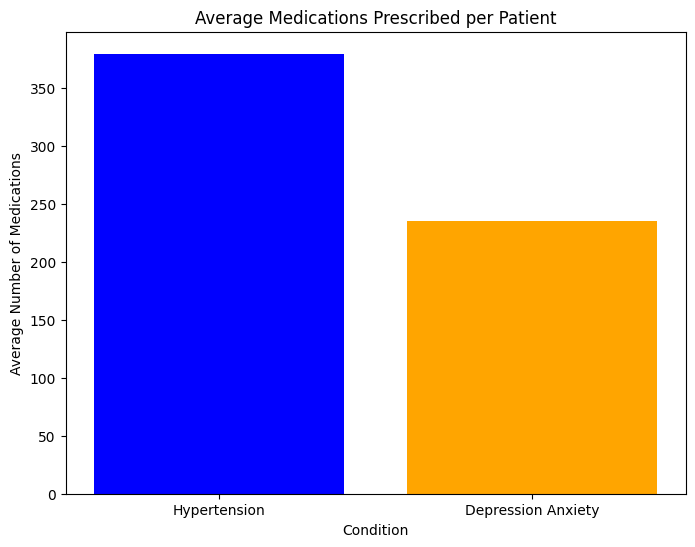

Average medications prescribed per patient:
Hypertension: 379.34
Depression Anxiety: 235.12


In [1]:
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt

# Connect to MongoDB
client = MongoClient("mongodb://localhost:27017/")
db = client["lang_patient_db"]

# Load collections into Pandas DataFrames
hypertension_data = pd.DataFrame(list(db.hyper.find()))
depression_anxiety_data = pd.DataFrame(list(db.depression_anxiety.find()))

# Count medications per patient for each dataset
hypertension_med_counts = hypertension_data.groupby("pat_id")["medication_name"].count()
depression_med_counts = depression_anxiety_data.groupby("pat_id")["medication_name"].count()

# Calculate mean medications per patient
hypertension_med_avg = hypertension_med_counts.mean()
depression_med_avg = depression_med_counts.mean()

# Plot
plt.figure(figsize=(8, 6))
plt.bar(["Hypertension", "Depression Anxiety"], [hypertension_med_avg, depression_med_avg], color=["blue", "orange"])
plt.title("Average Medications Prescribed per Patient")
plt.ylabel("Average Number of Medications")
plt.xlabel("Condition")
plt.show()

# Print results
print(f"Average medications prescribed per patient:")
print(f"Hypertension: {hypertension_med_avg:.2f}")
print(f"Depression Anxiety: {depression_med_avg:.2f}")


In [ ]:
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt

# Connect to MongoDB
client = MongoClient("mongodb://localhost:27017/")
db = client["lang_patient_db"]

# Load collections into Pandas DataFrames
hypertension_data = pd.DataFrame(list(db.hyper.find()))
depression_anxiety_data = pd.DataFrame(list(db.depression_anxiety.find()))

# Find patients with both hypertension and depression anxiety
hypertension_patients = set(hypertension_data["pat_id"].unique())
depression_patients = set(depression_anxiety_data["pat_id"].unique())
common_patients = hypertension_patients & depression_patients

# Patients with only hypertension
only_hypertension = hypertension_patients - common_patients
only_hypertension_data = hypertension_data[hypertension_data["pat_id"].isin(only_hypertension)]

# Patients with both hypertension and depression anxiety
both_conditions_data = hypertension_data[hypertension_data["pat_id"].isin(common_patients)]

# Count medications per patient for each group
only_hyper_med_counts = only_hypertension_data.groupby("pat_id")["medication_name"].count()
both_conditions_med_counts = both_conditions_data.groupby("pat_id")["medication_name"].count()

# Calculate mean medications per patient
only_hyper_med_avg = only_hyper_med_counts.mean()
both_conditions_med_avg = both_conditions_med_counts.mean()

# Plot
plt.figure(figsize=(8, 6))
plt.bar(["Only Hypertension", "Both Conditions"], [only_hyper_med_avg, both_conditions_med_avg], color=["blue", "orange"])
plt.title("Average Medications Prescribed per Patient")
plt.ylabel("Average Number of Medications")
plt.xlabel("Patient Group")
plt.show()

# Print results
print(f"Average medications prescribed per patient:")
print(f"Only Hypertension: {only_hyper_med_avg:.2f}")
print(f"Both Conditions: {both_conditions_med_avg:.2f}")


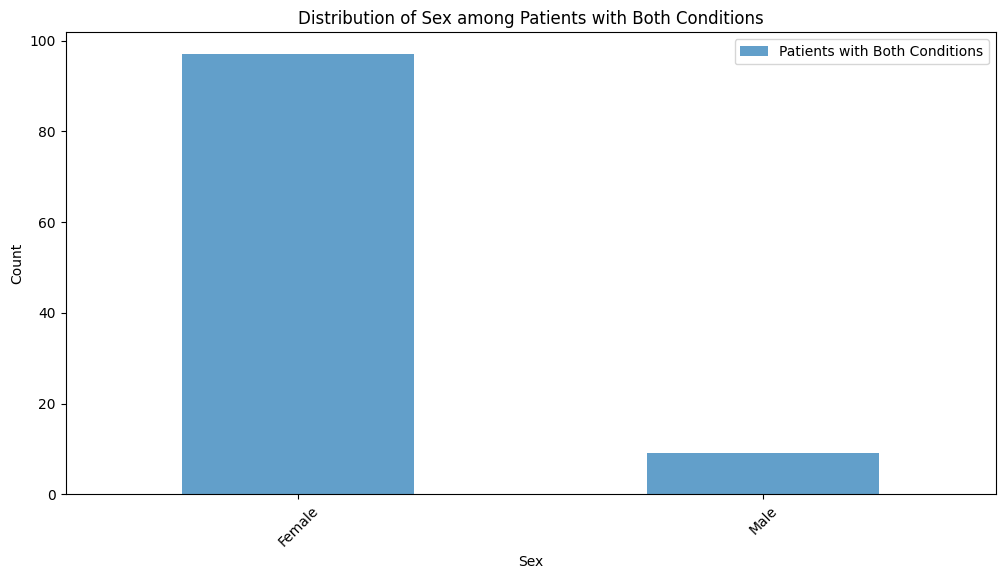

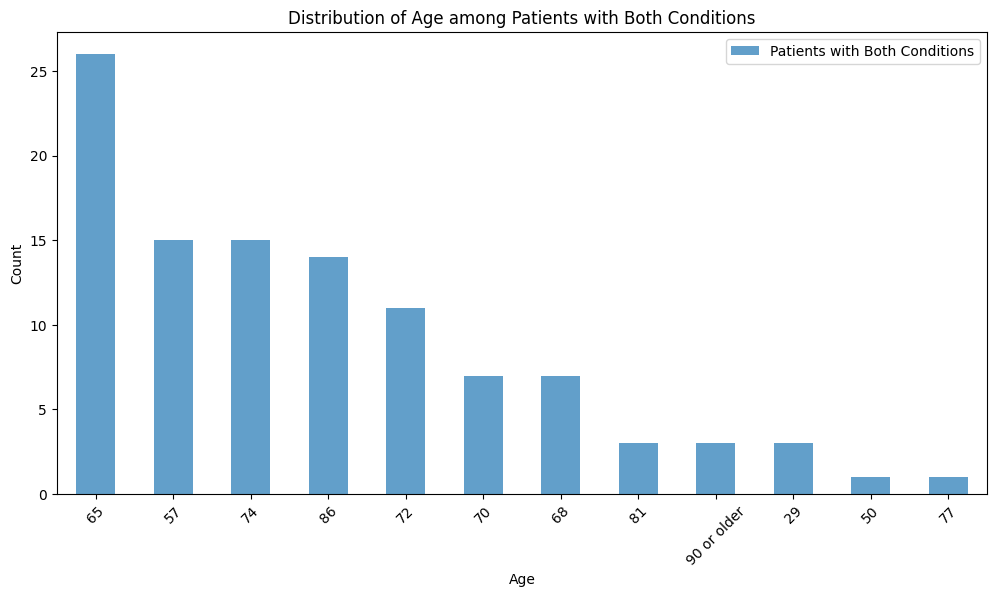

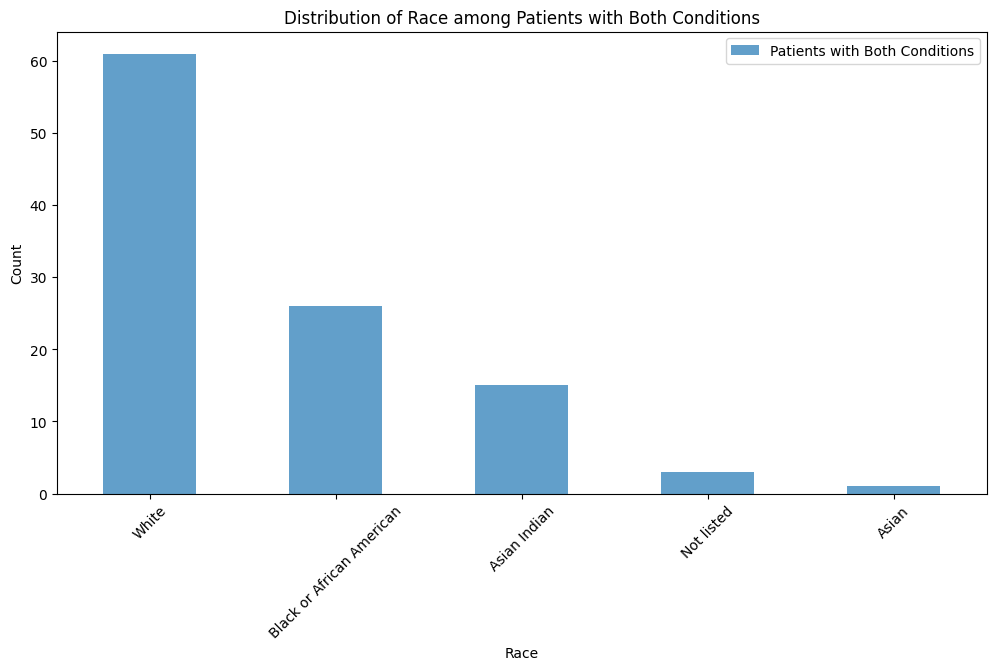

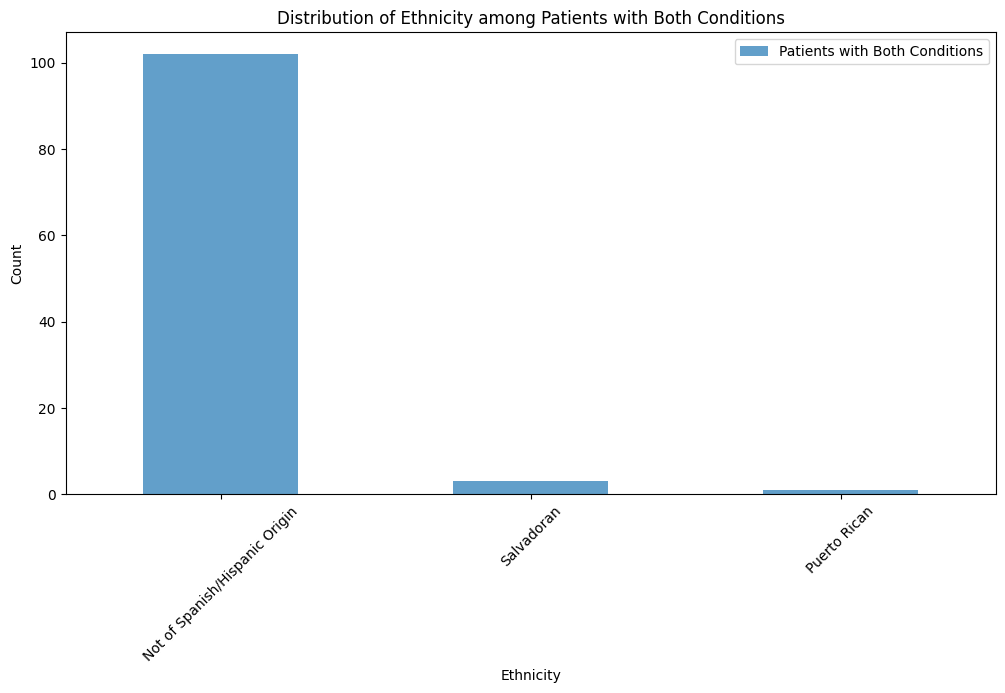


Age Statistics for Patients with Both Conditions:
count     106
unique     12
top        65
freq       26
Name: age, dtype: object


In [3]:
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt

# Connect to MongoDB
client = MongoClient("mongodb://localhost:27017/")
db = client["lang_patient_db"]

# Load collections into Pandas DataFrames
hypertension_data = pd.DataFrame(list(db.hyper.find().limit(1000)))
depression_anxiety_data = pd.DataFrame(list(db.depression_anxiety.find().limit(1000)))

# Ensure the 'pat_id' column exists
if "pat_id" in hypertension_data.columns and "pat_id" in depression_anxiety_data.columns:
    # Get unique patient IDs for each condition
    hypertension_patients = set(hypertension_data["pat_id"])
    depression_anxiety_patients = set(depression_anxiety_data["pat_id"])

    # Patients with both conditions
    common_patients = hypertension_patients & depression_anxiety_patients
    common_data = pd.concat([
        hypertension_data[hypertension_data["pat_id"].isin(common_patients)],
        depression_anxiety_data[depression_anxiety_data["pat_id"].isin(common_patients)]
    ])

    # Demographic Attributes
    demographic_columns = ["sex", "age", "race", "ethnicity"]

    # Plot side-by-side comparison
    for col in demographic_columns:
        if col in common_data.columns:
            plt.figure(figsize=(12, 6))

            # Plot counts for the attribute
            common_data[col].value_counts().plot(kind="bar", alpha=0.7, label="Patients with Both Conditions")
            plt.title(f"Distribution of {col.capitalize()} among Patients with Both Conditions")
            plt.xlabel(col.capitalize())
            plt.ylabel("Count")
            plt.legend()
            plt.xticks(rotation=45)
            plt.show()

    # Print summary statistics for numerical attributes
    if "age" in common_data.columns:
        print("\nAge Statistics for Patients with Both Conditions:")
        print(common_data["age"].describe())

else:
    print("Patient ID ('pat_id') column is not available in one or both datasets.")